In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
#import spacy
import string
df = pd.read_csv("/content/drive/MyDrive/Social Media Analytics/Session PPTs/S11/IMDB Dataset.csv")

df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [ ]:
df.shape

(14640, 15)

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Total number of words in the df

In [ ]:
count = df["review"].str.split().str.len()
sum(count)

11557847

In [ ]:
df["text_lower"] = df["review"].str.lower()
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          text_lower  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production. <br /><br />the...  
2  i thought this was a wonderful way to spend ti...  
3  basically there's a family where a little boy ...  
4  petter mattei's "love in the time of money" is...

In [ ]:
import re
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
df["text_lower"] =df["text_lower"].apply(lambda text: remove_html(text))
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          text_lower  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production. the filming tec...  
2  i thought this was a wonderful way to spend ti...  
3  basically there's a family where a little boy ...  
4  petter mattei's "love in the time of money" is...

## Removal of Punctuations

One another common text preprocessing technique is to remove the punctuations from the text data. This is again a text standardization process that will help to treat 'hurray' and 'hurray!' in the same way.

We also need to carefully choose the list of punctuations to exclude depending on the use case. For example, the `string.punctuation` in python contains the following punctuation symbols 

`!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~`

We can add or remove more punctuations as per our need.

In [ ]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          text_lower  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. the filming tec...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                       text_wo_punct  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production the filming tech...  
2  i thought this was a wonderful way to spend ti...  
3  basically theres a family where a little boy j...  
4  petter matteis love in the time of money is a ...

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
STOPWORDS = set(stopwords.words('english'))
#STOPWORDS.add('AppleSupport')
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          text_lower  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. the filming tec...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                       text_wo_punct  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                        text_wo_stop  
0  one reviewers mentioned watching 1 oz episode ...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...

In [ ]:
count = df["text_wo_stop"].str.split().str.len()
sum(count)

5992785

## Stemming

Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form (From [Wikipedia](https://en.wikipedia.org/wiki/Stemming))

For example, if there are two words in the corpus `walks` and `walking`, then stemming will stem the suffix to make them `walk`. But say in another example, we have two words `console` and `consoling`, the stemmer will remove the suffix and make them `consol` which is not a proper english word.

There are several type of stemming algorithms available and one of the famous one is porter stemmer which is widely used. We can use nltk package for the same.

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_wo_stop"].apply(lambda text: stem_words(text))
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          text_lower  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. the filming tec...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                       text_wo_punct  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                        text_wo_stop  \
0  one reviewers mentioned watching 1 oz episode ...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                        text_stemmed  
0  one review mention watch 1 oz episod youll hoo...  
1  wonder littl product film techniqu unassum old...  
2  thought wonder way spend time hot summer weeke...  
3  basic there famili littl boy jake think there ...  
4  petter mattei love time money visual stun film...

## Lemmatization

Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language. 

As a result, this one is generally slower than stemming process. So depending on the speed requirement, we can choose to use either stemming or lemmatization. 

Let us use the `WordNetLemmatizer` in nltk to lemmatize our sentences

Now let us redo the lemmatization process for our dataset.

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df["text_wo_stop"].apply(lambda text: lemmatize_words(text))
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          text_lower  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. the filming tec...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                       text_wo_punct  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                        text_wo_stop  \
0  one reviewers mentioned watching 1 oz episode ...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                        text_stemmed  \
0  one review mention watch 1 oz episod youll hoo...   
1  wonder littl product film techniqu unassum old...   
2  thought wonder way spend time hot summer weeke...   
3  basic there famili littl boy jake think there ...   
4  petter mattei love time money visual stun film...   

                                     text_lemmatized  
0  one reviewer mention watch 1 oz episode youll ...  
1  wonderful little production film technique una...  
2  think wonderful way spend time hot summer week...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...

## Getting Sentiment Score Using TextBlob

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
df['TextBlob_Pol'] = 0.0

def textblobpol(text):
  sent = TextBlob(text)
  return sent.sentiment.polarity

df['TextBlob_Pol']  = df['text_lemmatized'].apply(lambda text: textblobpol(text))

df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          text_lower  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. the filming tec...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                       text_wo_punct  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                        text_wo_stop  \
0  one reviewers mentioned watching 1 oz episode ...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                        text_stemmed  \
0  one review mention watch 1 oz episod youll hoo...   
1  wonder littl product film techniqu unassum old...   
2  thought wonder way spend time hot summer weeke...   
3  basic there famili littl boy jake think there ...   
4  petter mattei love time money visual stun film...   

                                     text_lemmatized  TextBlob_Pol  
0  one reviewer mention watch 1 oz episode youll ...      0.024704  
1  wonderful little production film technique una...      0.127604  
2  think wonderful way spend time hot summer week...      0.291837  
3  basically there family little boy jake think t...     -0.067188  
4  petter matteis love time money visually stunni...      0.244476

In [ ]:
df['TextBlob_Pol_Class']  = df['TextBlob_Pol'].apply(lambda x: 'positive' if x>=0 else 'negative')
df['TextBlob_Pol_Class'].value_counts()

positive    36902
negative    13098
Name: TextBlob_Pol_Class, dtype: int64

In [ ]:
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          text_lower  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. the filming tec...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                       text_wo_punct  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                        text_wo_stop  \
0  one reviewers mentioned watching 1 oz episode ...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                        text_stemmed  \
0  one review mention watch 1 oz episod youll hoo...   
1  wonder littl product film techniqu unassum old...   
2  thought wonder way spend time hot summer weeke...   
3  basic there famili littl boy jake think there ...   
4  petter mattei love time money visual stun film...   

                                     text_lemmatized  TextBlob_Pol  \
0  one reviewer mention watch 1 oz episode youll ...      0.024704   
1  wonderful little production film technique una...      0.127604   
2  think wonderful way spend time hot summer week...      0.291837   
3  basically there family little boy jake think t...     -0.067188   
4  petter matteis love time money visually stunni...      0.244476   

  TextBlob_Pol_Class  
0           positive  
1           positive  
2           positive  
3           negative  
4           positive

## Getting Sentiment Score Using Sentiment Intensity Analyzer

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
a = 'This was a good movie'
#sid.polarity_scores(a)['compound']
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [ ]:
df['SIA_CompundScore'] = df['text_lemmatized'].apply(lambda text: sid.polarity_scores(text)['compound'])
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          text_lower  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. the filming tec...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                       text_wo_punct  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                        text_wo_stop  \
0  one reviewers mentioned watching 1 oz episode ...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                        text_stemmed  \
0  one review mention watch 1 oz episod youll hoo...   
1  wonder littl product film techniqu unassum old...   
2  thought wonder way spend time hot summer weeke...   
3  basic there famili littl boy jake think there ...   
4  petter mattei love time money visual stun film...   

                                     text_lemmatized  TextBlob_Pol  \
0  one reviewer mention watch 1 oz episode youll ...      0.024704   
1  wonderful little production film technique una...      0.127604   
2  think wonderful way spend time hot summer week...      0.291837   
3  basically there family little boy jake think t...     -0.067188   
4  petter matteis love time money visually stunni...      0.244476   

  TextBlob_Pol_Class  SIA_CompundScore  
0           positive           -0.9927  
1           positive            0.9594  
2           positive            0.9542  
3           negative           -0.9080  
4           positive            0.9839

In [ ]:
df['SIA_Class']  = df['SIA_CompundScore'].apply(lambda x: 'positive' if x>=0 else 'negative')

In [ ]:
df['SIA_Class'].value_counts()

positive    34374
negative    15626
Name: SIA_Class, dtype: int64

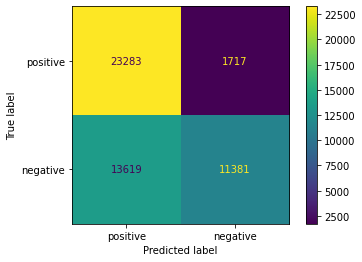

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df['sentiment'], df['TextBlob_Pol_Class'], labels = ['positive','negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =['positive','negative'])
disp.plot()

plt.show()

In [ ]:
cm[0,0],cm[1,1]

(23283, 11381)

In [ ]:
sum(sum(cm))

50000

In [ ]:
print("Accuracy:", (cm[0,0]+cm[1,1])/(sum(sum(cm)))*100)

Accuracy: 69.328


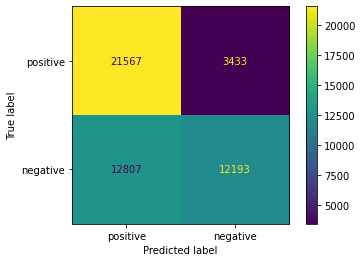

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df['sentiment'], df['SIA_Class'], labels = ['positive','negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =['positive','negative'])
disp.plot()

plt.show()

In [ ]:
print("Accuracy:", (cm[0,0]+cm[1,1])/(sum(sum(cm)))*100)

Accuracy: 67.52


## Creating Word Cloud

In [ ]:
from wordcloud import WordCloud

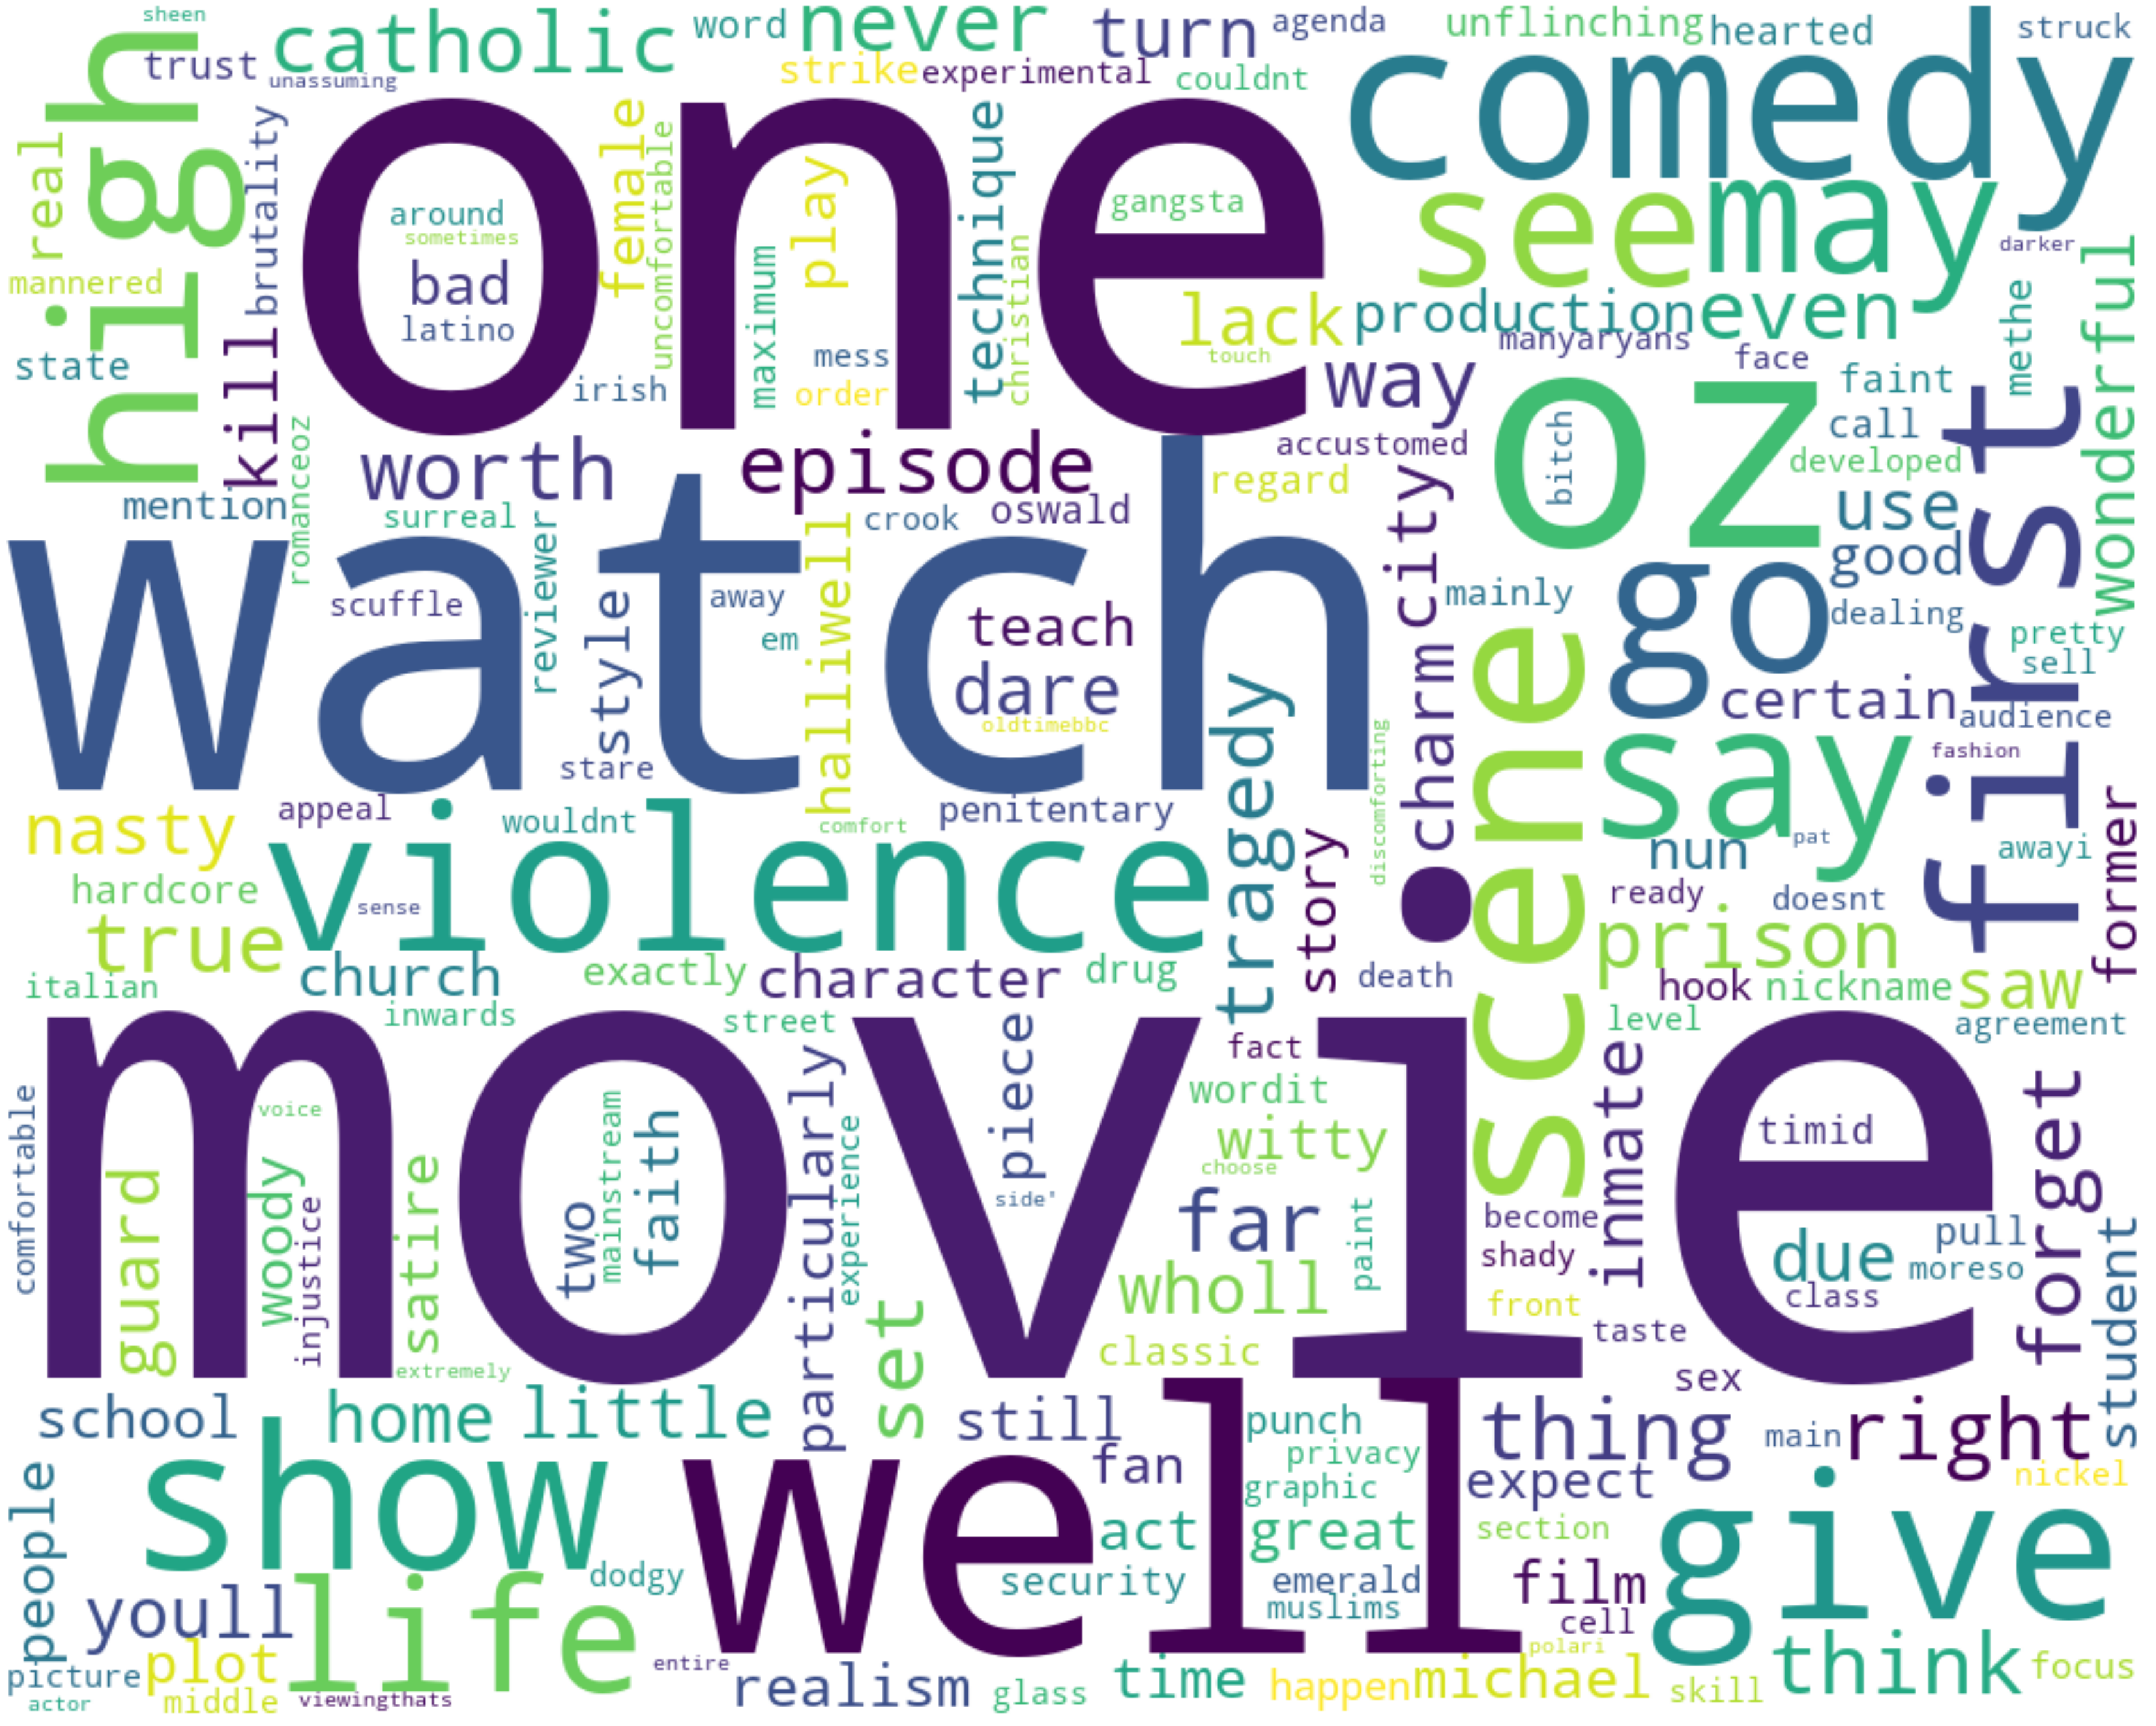

In [ ]:
text = df['text_lemmatized'].values
plt.figure(figsize = (60,60))
word_cloud = WordCloud(width = 1000, height = 800,collocations = False, background_color = 'white').generate(str(text))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Getting Sentiment Score Using Flair 

In [ ]:
pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.9/401.9 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 62.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 77.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 KB 74.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

classifier = TextClassifier.load('en-sentiment')
sentence = Sentence('The food was great!')
classifier.predict(sentence)

# print sentence with predicted labels
print('Sentence above is: ', sentence.labels)

2023-02-02 10:55:27,340 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpky243z06


100%|██████████| 265512723/265512723 [00:07<00:00, 37890940.52B/s]

2023-02-02 10:55:34,441 copying /tmp/tmpky243z06 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2023-02-02 10:55:35,183 removing temp file /tmp/tmpky243z06
2023-02-02 10:55:35,303 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Sentence above is:  ['Sentence: "The food was great !"'/'POSITIVE' (0.9961)]


In [ ]:
def get_flair_sent(text):
  sentence = Sentence(text)
  classifier.predict(sentence)
  return sentence.tag.lower()

df['Flair_Class']  = df['text_lemmatized'].apply(lambda text: get_flair_sent(text))
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                          text_lower  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production. the filming tec...   
2  i thought this was a wonderful way to spend ti...   
3  basically there's a family where a little boy ...   
4  petter mattei's "love in the time of money" is...   

                                       text_wo_punct  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production the filming tech...   
2  i thought this was a wonderful way to spend ti...   
3  basically theres a family where a little boy j...   
4  petter matteis love in the time of money is a ...   

                                        text_wo_stop  \
0  one reviewers mentioned watching 1 oz episode ...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                        text_stemmed  \
0  one review mention watch 1 oz episod youll hoo...   
1  wonder littl product film techniqu unassum old...   
2  thought wonder way spend time hot summer weeke...   
3  basic there famili littl boy jake think there ...   
4  petter mattei love time money visual stun film...   

                                     text_lemmatized  TextBlob_Pol  \
0  one reviewer mention watch 1 oz episode youll ...      0.024704   
1  wonderful little production film technique una...      0.127604   
2  think wonderful way spend time hot summer week...      0.291837   
3  basically there family little boy jake think t...     -0.067188   
4  petter matteis love time money visually stunni...      0.244476   

  TextBlob_Pol_Class  SIA_CompundScore SIA_Class Flair_Class  
0           positive           -0.9927  negative    negative  
1           positive            0.9594  positive    positive  
2           positive            0.9542  positive    positive  
3           negative           -0.9080  negative    negative  
4           positive            0.9839  positive    positive

In [ ]:
df['Flair_Class'].value_counts()

negative    34014
positive    15986
Name: Flair_Class, dtype: int64

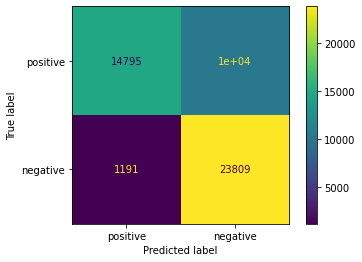

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df['sentiment'], df['Flair_Class'], labels = ['positive','negative'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =['positive','negative'])
disp.plot()

plt.show()

In [ ]:
print("Accuracy:", (cm[0,0]+cm[1,1])/(sum(sum(cm)))*100)

Accuracy: 77.208
